In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pims

from scipy.ndimage import gaussian_filter
import tifffile


datapath = r'C:\Itamar\Soft matter\Active solids\2022-12-26 helping anne bernheim\Shachar data\Itamar\T35'

imseq =pims.ImageSequence(datapath+r'\*.tif')

In [22]:
import numpy as np
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
movie = 'Control'
#movie = '130721'
#movie ='140721'
#movie ='150721'
#movie ='100621'
movie ='130721_CCA60_RAW'

MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'

In [23]:
#get list of files in directory
import os
filelist = os.listdir(MOVIE_PATH + 'tiff')
file_list_numbered = []
for i in range(len(filelist)):
    #split file by '_'
    t = int(filelist[i].split('_')[-2][1:])
    file_list_numbered.append((t,filelist[i]))
    #sort by time
file_list_numbered.sort(key = lambda x: x[0])
for t in range(len(file_list_numbered)):
    print(file_list_numbered[t][0],file_list_numbered[t][1])




0 CCA60 arp40  - 0_T0_C1.tif
2 CCA60 arp40 _T2_C1.tif
3 CCA60 arp40 _T3_C1.tif
4 CCA60 arp40 _T4_C1.tif
5 CCA60 arp40 _T5_C1.tif
6 CCA60 arp40 _T6_C1.tif
7 CCA60 arp40 _T7_C1.tif
8 CCA60 arp40 _T8_C1.tif
9 CCA60 arp40 _T9_C1.tif
10 CCA60 arp40 _T10_C1.tif
11 CCA60 arp40 _T11_C1.tif
12 CCA60 arp40 _T12_C1.tif
13 CCA60 arp40 _T13_C1.tif
14 CCA60 arp40 _T14_C1.tif
15 CCA60 arp40 _T15_C1.tif
16 CCA60 arp40 _T16_C1.tif
17 CCA60 arp40 _T17_C1.tif
18 CCA60 arp40 _T18_C1.tif
19 CCA60 arp40 _T19_C1.tif
20 CCA60 arp40 _T20_C1.tif
21 CCA60 arp40  - 1_T21_C1.tif
22 CCA60 arp40  - 1_T22_C1.tif
23 CCA60 arp40  - 1_T23_C1.tif
24 CCA60 arp40  - 1_T24_C1.tif
25 CCA60 arp40  - 1_T25_C1.tif
26 CCA60 arp40  - 1_T26_C1.tif
27 CCA60 arp40  - 1_T27_C1.tif
28 CCA60 arp40  - 1_T28_C1.tif
29 CCA60 arp40  - 1_T29_C1.tif
30 CCA60 arp40  - 1_T30_C1.tif
31 CCA60 arp40  - 1_T31_C1.tif
32 CCA60 arp40  - 1_T32_C1.tif
33 CCA60 arp40  - 1_T33_C1.tif
34 CCA60 arp40  - 1_T34_C1.tif
35 CCA60 arp40  - 1_T35_C1.tif
36 CCA60 

In [24]:
#load images
gel_list = []
for i in range(len(file_list_numbered)):
    gel_list.append(tifffile.imread(MOVIE_PATH + 'tiff/' + file_list_numbered[i][1]))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


ImageJ series: invalid metadata or corrupted file ()


35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61


In [25]:

max_z = 0
for image in gel_list:
    print(image.shape)
    z = image.shape[0]
    if z > max_z:
        max_z = z
print(max_z)


(64, 512, 512)
(86, 512, 512)
(86, 512, 512)
(86, 512, 512)
(86, 512, 512)
(86, 512, 512)
(86, 512, 512)
(86, 512, 512)
(86, 512, 512)
(86, 512, 512)
(86, 512, 512)
(86, 512, 512)
(86, 512, 512)
(86, 512, 512)
(86, 512, 512)
(86, 512, 512)
(86, 512, 512)
(86, 512, 512)
(86, 512, 512)
(86, 512, 512)
(160, 512, 512)
(160, 512, 512)
(160, 512, 512)
(160, 512, 512)
(160, 512, 512)
(160, 512, 512)
(160, 512, 512)
(160, 512, 512)
(160, 512, 512)
(160, 512, 512)
(160, 512, 512)
(160, 512, 512)
(160, 512, 512)
(160, 512, 512)
(160, 512, 512)
(160, 512, 512)
(120, 512, 512)
(160, 512, 512)
(160, 512, 512)
(160, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
(81, 512, 512)
160


In [26]:
gel = np.zeros((len(gel_list), max_z,*gel_list[0].shape[1:]))
for t in range(len(gel)):
    gel[t,:gel_list[t].shape[0],:,:] = gel_list[t]

In [27]:
np.save(MOVIE_PATH + 'np/gel.npy',gel)

In [31]:
gel = np.load(MOVIE_PATH + 'np/gel.npy')



In [102]:
t = 20
imseq = gel[t]


In [103]:
np.array(imseq[10]).shape

(512, 512)

im = imseq[0]
imsz = im.shape
im_stack = np.zeros(imsz +(len(imseq),))

for i in range(len(imseq)):
    im_stack[:,:,i] = imseq[i]
print(im_stack.shape)

In [104]:
im_stack = imseq

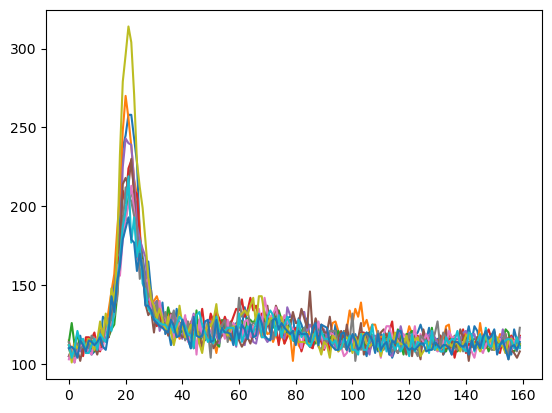

In [105]:
plt.figure()
for i  in range(0,512,50):
    plt.plot(im_stack[:,256,i])

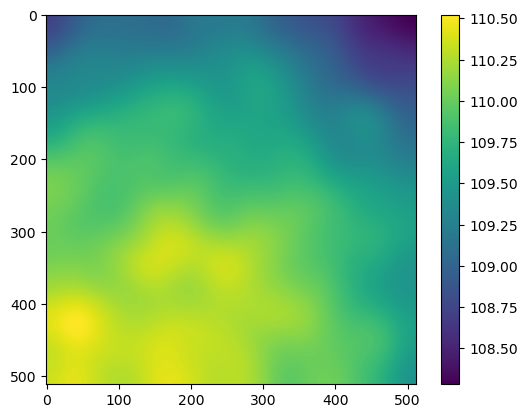

In [106]:
bg_below_plate = gaussian_filter(np.mean(im_stack[0:5,:,:],axis = 0),25)
plt.imshow(bg_below_plate); plt.colorbar()

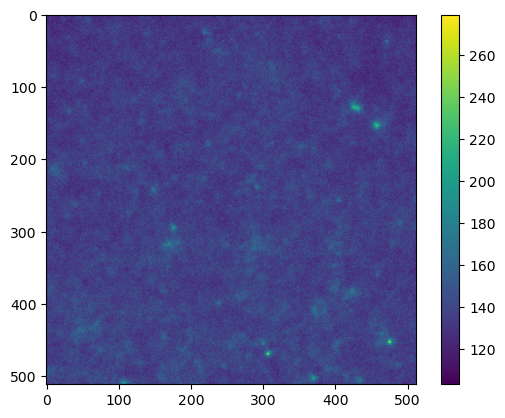

In [107]:
z_index = 30
frame = im_stack[z_index, :, :]
plt.imshow(frame);
plt.colorbar()

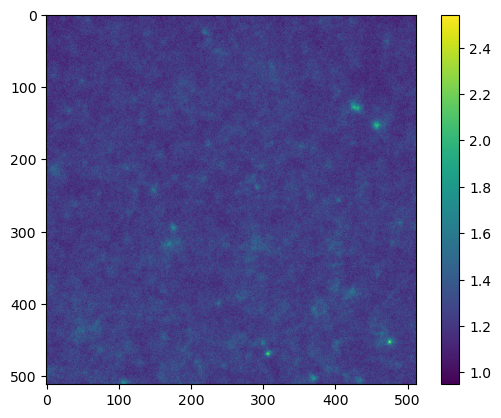

In [108]:
even_illumination_frame = frame/bg_below_plate
plt.imshow(even_illumination_frame); plt.colorbar()

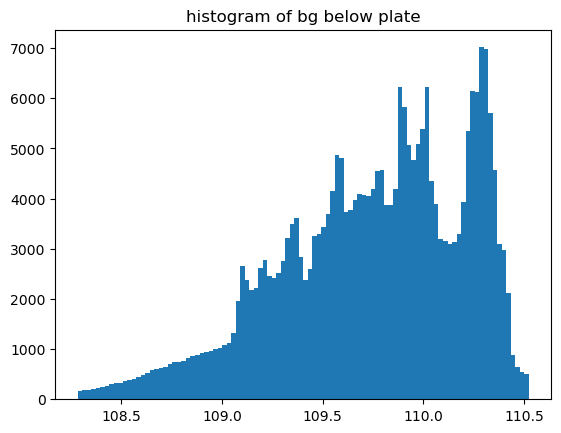

In [109]:
plt.hist(bg_below_plate.flatten(),bins = 100)
plt.title('histogram of bg below plate')
plt.show()

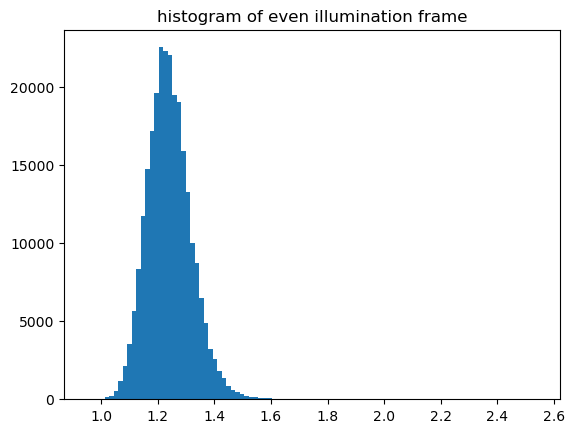

In [110]:
plt.hist(even_illumination_frame.flatten(),bins = 100)
plt.title('histogram of even illumination frame')
plt.show()

Text(0.5, 1.0, 'monomer above tp')

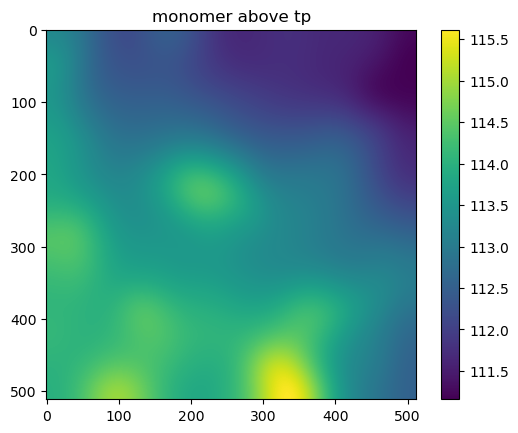

In [118]:
bg_above_tp = gaussian_filter(np.mean(im_stack[120:140,:],axis = 0),25)
plt.imshow(bg_above_tp);
plt.colorbar()
plt.title('monomer above tp')

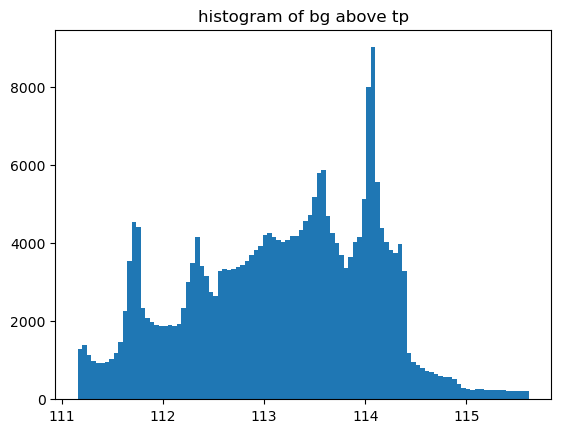

In [119]:
plt.hist(bg_above_tp.flatten(),bins = 100)
plt.title('histogram of bg above tp')
plt.show()


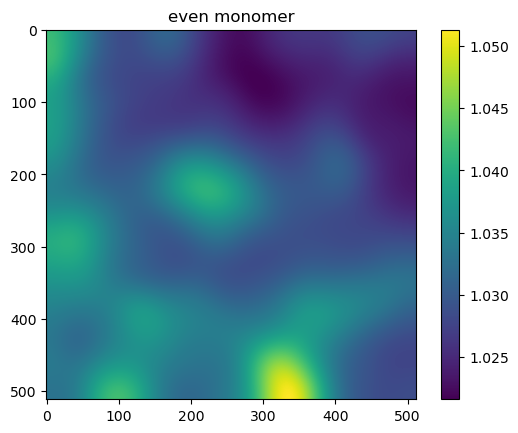

In [120]:
even_monomer = bg_above_tp/bg_below_plate
plt.imshow(even_monomer); plt.colorbar()
plt.title('even monomer')
plt.show()

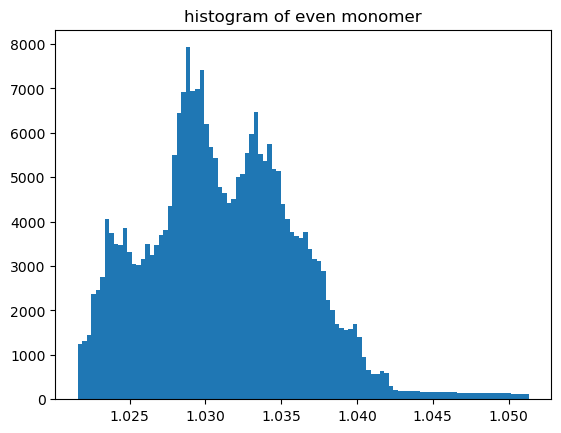

In [121]:
plt.hist(even_monomer.flatten(),bins = 100)
plt.title('histogram of even monomer')
plt.show()


In [122]:
monomer_std = np.std(bg_above_tp/bg_below_plate); monomer_mean = np.mean(bg_above_tp/bg_below_plate)
print("monomer mean",monomer_mean, "monomer std",monomer_std)
print("mean bg below", np.mean(bg_below_plate), "std", np.std(bg_below_plate))

monomer mean 1.0312429978791327 monomer std 0.005013125720304458
mean bg below 109.74630813598634 std 0.4605526069283522


In [123]:
imstack_bg = np.zeros(im_stack.shape)
for i in range(len(imseq)):
    imstack_bg[i,:,:] = gaussian_filter(im_stack[i,:,:],2)/bg_below_plate/monomer_mean

(0.9, 1.2)

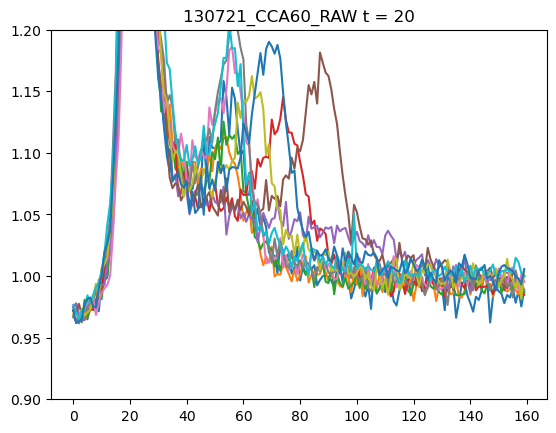

In [124]:
plt.figure()
for i  in range(0,512,50):
    plt.plot(imstack_bg[:,i,256])
plt.title(movie +" t = %d"%t)
plt.ylim([0.9,1.2])

In [126]:
thresh = 1+ monomer_std *3
print("threshold",thresh)

threshold 1.0150393771609134


In [127]:


h = np.zeros(im.shape)
for i in range(h.shape[0]):
    for j in range(h.shape[1]):
        h[i,j] = np.where(imstack_bg[:,i,j]>thresh)[0][-1]

In [128]:
h

array([[159., 138., 138., ..., 102., 102., 122.],
       [159., 134., 138., ..., 102., 102., 122.],
       [135., 134., 138., ...,  93.,  96.,  96.],
       ...,
       [157., 157., 143., ...,  95., 153., 153.],
       [158., 157., 143., ..., 126., 153., 153.],
       [158., 157., 143., ..., 126., 126., 126.]])

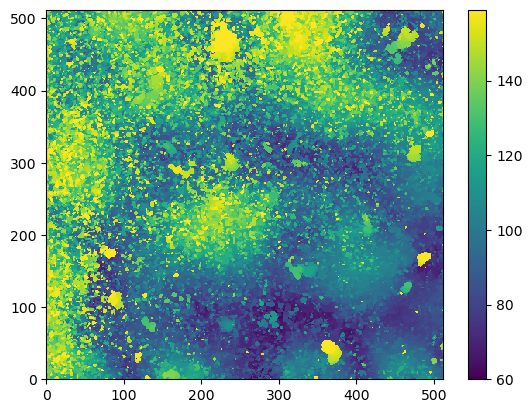

In [129]:
plt.pcolormesh(h);plt.colorbar()


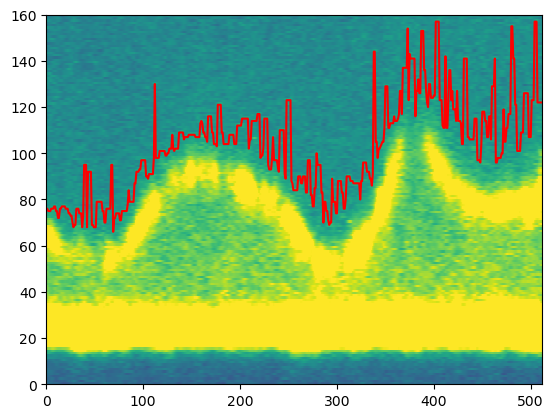

In [130]:
plt.pcolormesh(imstack_bg[:,:,400]);plt.plot(h[:,400],'r')
#plt.xlim([150,200])
plt.clim([0.9,1.1])